# Rolling ball background subtraction

We will use "rolling ball" technique to subtract background. This technique works with grayscale image. If you want apply it to `rgb`-image convert it to `lab` and perform for `l`-channel 

In [1]:
import cv2
import matplotlib.pyplot as plt
from cv2_rolling_ball import subtract_background_rolling_ball as sbrb

In [2]:
# let's apply at first `clahe` normalization and check does it solve our task or not
img = cv2.imread("../inpdata/images/Alloy_gradient.jpg", 1)
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_img)

In [3]:
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
norm_img = cv2.merge((clahe_img, a, b))
norm_img = cv2.cvtColor(norm_img, cv2.COLOR_LAB2RGB)

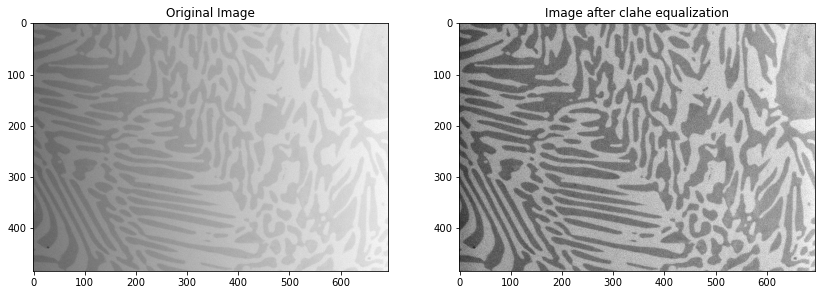

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(14,7))
axs.flat[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs.flat[0].title.set_text("Original Image")

axs.flat[1].imshow(norm_img)
axs.flat[1].title.set_text("Image after clahe equalization")

In [5]:
# now let's use rolling ball
r = 50 # radius for rolling ball (radius should be larger then object's of interest, otherwise they will be removed)
final_img, background = sbrb(l, r, light_background=True, use_paraboloid=False, do_presmooth=True)

In [6]:
frb_img = cv2.merge((final_img, a, b))
frb_img = cv2.cvtColor(frb_img, cv2.COLOR_LAB2RGB)

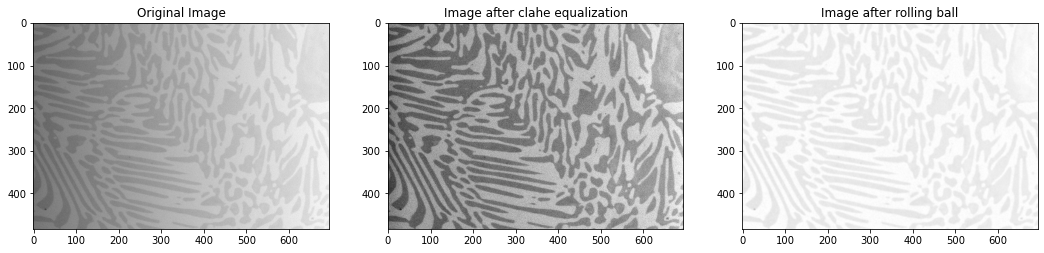

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
axs.flat[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs.flat[0].title.set_text("Original Image")

axs.flat[1].imshow(norm_img)
axs.flat[1].title.set_text("Image after clahe equalization")

axs.flat[2].imshow(frb_img)
axs.flat[2].title.set_text("Image after rolling ball")